In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from grid.shake import ShakeGrid
from mpl_toolkits.basemap import Basemap
from collections import OrderedDict
from datetime import datetime
import os.path

The Grid class hierarchy can be used for reading, writing and manipulating various kinds of 2D grid formats (GMT grids), or multi-layer 2D grid formats (ShakeMap).

In [3]:
#######MODIFY THIS TO REFLECT THE LOCATION OF A GLOBAL GRID ON YOUR SYSTEM####
shakefile = '/Users/mhearne/data/shakemaps/northridge.xml'
##############################################################################

In [4]:
def map2DGrid(ax,grid,tstr,isLeft=False):
    """
    grid is a Grid2D object 
    """
    xmin,xmax,ymin,ymax = grid.getBounds()
    pdata = grid.getData()
    nr,nc = pdata.shape
    lonrange = np.linspace(xmin,xmax,num=nc)
    latrange = np.linspace(ymin,ymax,num=nr)
    lon,lat = np.meshgrid(lonrange,latrange)
    latmean = np.mean([ymin,ymax])
    lonmean = np.mean([xmin,xmax])
    m = Basemap(llcrnrlon=xmin,llcrnrlat=ymin,urcrnrlon=xmax,urcrnrlat=ymax,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='i',area_thresh=1000.,projection='lcc',\
            lat_1=latmean,lon_0=lonmean,ax=ax)
    # draw coastlines and political boundaries.
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()
    lons = np.arange(xmin,xmax,1.0)
    lats = np.arange(ymin,ymax,1.0)
    if isLeft:
        labels = labels=[1,0,0,0]
    else:
        labels = labels=[0,0,0,0]
    m.drawparallels(lats,labels=labels,color='white',fmt='%.1f') # draw parallels
    m.drawmeridians(lons,labels=[0,0,0,1],color='white',fmt='%.1f') # draw meridians
    pmesh = m.pcolormesh(lon,lat,np.flipud(grid.getData()),latlon=True)
    plt.hold(True)
    ax.set_title(tstr)
    m.colorbar(pmesh)

{'ymax': 36.2785, 'ncols': 601, 'xdim': 0.008333, 'nrows': 497, 'xmax': -116.046, 'xmin': -121.046, 'ymin': 32.1435, 'ydim': 0.008337}


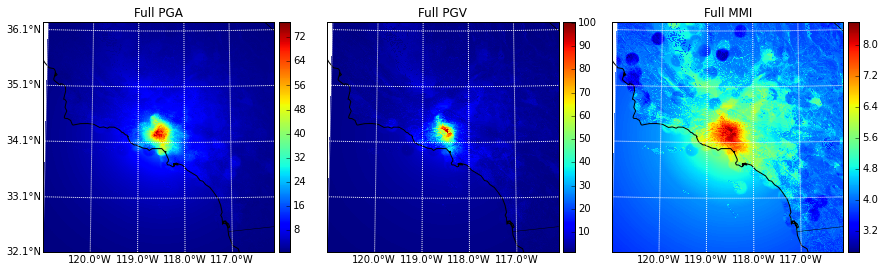

In [5]:
shakegrid = ShakeGrid.load(shakefile)
pgagrid = shakegrid.getLayer('pga')
pgvgrid = shakegrid.getLayer('pgv')
mmigrid = shakegrid.getLayer('mmi')
fig,(ax0,ax1,ax2) = plt.subplots(nrows=1,ncols=3,figsize=(12,6))
fig.tight_layout()
map2DGrid(ax0,pgagrid,'Full PGA',isLeft=True)
map2DGrid(ax1,pgvgrid,'Full PGV')
map2DGrid(ax2,mmigrid,'Full MMI')
print pgagrid.getGeoDict()

In [6]:
geodict = ShakeGrid.getFileGeoDict(shakefile)
#bring in the shakemap by a half dimension (quarter on each side)
lonrange = geodict['xmax'] - geodict['xmin']
latrange = geodict['ymax'] - geodict['ymin']
geodict['xmin'] = geodict['xmin'] + lonrange/4.0
geodict['xmax'] = geodict['xmax'] - lonrange/4.0
geodict['ymin'] = geodict['ymin'] + latrange/4.0
geodict['ymax'] = geodict['ymax'] - latrange/4.0
shakegrid = shake.ShakeGrid.load(shakefile,samplegeodict=geodict)
pgagrid = shakegrid.getLayer('pga')
pgvgrid = shakegrid.getLayer('pgv')
mmigrid = shakegrid.getLayer('mmi')
fig,(ax0,ax1,ax2) = plt.subplots(nrows=1,ncols=3,figsize=(12,6))
fig.tight_layout()
map2DGrid(ax0,pgagrid,'Trimmed PGA',isLeft=True)
map2DGrid(ax1,pgvgrid,'Trimmed PGV')
map2DGrid(ax2,mmigrid,'Trimmed MMI')
print pgagrid.getGeoDict()

NameError: name 'shake' is not defined

In [ ]:
fdict = ShakeGrid.getFileGeoDict(shakefile)
newdict = {'xmin':-120.0,
           'xmax':-118.0,
           'ymin':33.0,
           'ymax':35.0,
           'xdim':fdict['xdim'],
           'ydim':fdict['ydim']}
shakegrid = ShakeGrid.load(shakefile,samplegeodict=newdict)
pgagrid = shakegrid.getLayer('pga')
pgvgrid = shakegrid.getLayer('pgv')
mmigrid = shakegrid.getLayer('mmi')
fig,(ax0,ax1,ax2) = plt.subplots(nrows=1,ncols=3,figsize=(12,6))
fig.tight_layout()
map2DGrid(ax0,pgagrid,'Partial PGA',isLeft=True)
map2DGrid(ax1,pgvgrid,'Partial PGV')
map2DGrid(ax2,mmigrid,'Partial MMI')

In [ ]:
print pgagrid.getGeoDict()

Creating a ShakeMap

In [ ]:
pga = np.arange(0,16,dtype=np.float32).reshape(4,4)
pgv = np.arange(1,17,dtype=np.float32).reshape(4,4)
mmi = np.arange(2,18,dtype=np.float32).reshape(4,4)
geodict = {'xmin':0.5,'ymax':3.5,'ymin':0.5,'xmax':3.5,'xdim':1.0,'ydim':1.0,'nrows':4,'ncols':4}
layers = OrderedDict()
layers['pga'] = pga
layers['pgv'] = pgv
layers['mmi'] = mmi
shakeDict = {'event_id':'usabcd1234',
             'shakemap_id':'usabcd1234',
             'shakemap_version':1,
             'code_version':'4.0',
             'process_timestamp':datetime.utcnow(),
             'shakemap_originator':'us',
             'map_status':'RELEASED',
             'shakemap_event_type':'ACTUAL'}
eventDict = {'event_id':'usabcd1234',
             'magnitude':7.6,
             'depth':1.4,
             'lat':2.0,
             'lon':2.0,
             'event_timestamp':datetime.utcnow(),
             'event_network':'us',
             'event_description':'sample event'}
uncDict = {'pga':(0.0,0),
           'pgv':(0.0,0),
           'mmi':(0.0,0)}
shake = ShakeGrid(layers,geodict,eventDict,shakeDict,uncDict)
shake.save('grid.xml',version=1)
shake2 = ShakeGrid.load('grid.xml')
os.remove('grid.xml')